# Differential evolution

Algorithm: https://en.wikipedia.org/wiki/Differential_evolution

In [1]:
from IPython.display import clear_output
from modules.plotter import print_result
from modules.golomb_problem import init_simple_problem, init_medium_problem

import pygmo as pg
from scipy.optimize import differential_evolution

UDP = init_simple_problem()
# real_bound = [(-1, 1) for _ in range(15)]+[(-10, 10) for _ in range(15)]

## Simple Problem

### SciPy

Doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html

#### Stock

Solution:  [-1.30105698e-01 -3.50876511e-01 -2.31849321e-01  2.28217961e-01
 -8.76926322e-02 -1.95541272e-01  5.83654923e-01  2.44133069e-01
 -8.38544686e-01  2.80971310e-01 -1.47443458e-01 -8.38611501e-02
  6.69819712e-01  6.02980929e-01 -3.99298028e-01 -7.64703824e-01
  3.83675836e-01  7.87337264e-02 -7.50993361e-01 -4.79004777e-01
 -2.93304016e-01 -9.32002848e-01 -5.61631131e-01  6.21685000e-01
 -2.78825875e-01  7.34591928e-01  1.13713580e-01  5.81083858e-01
 -6.48155092e-04  8.13301754e-01]
Fitness:  [-0.14285714285714285]


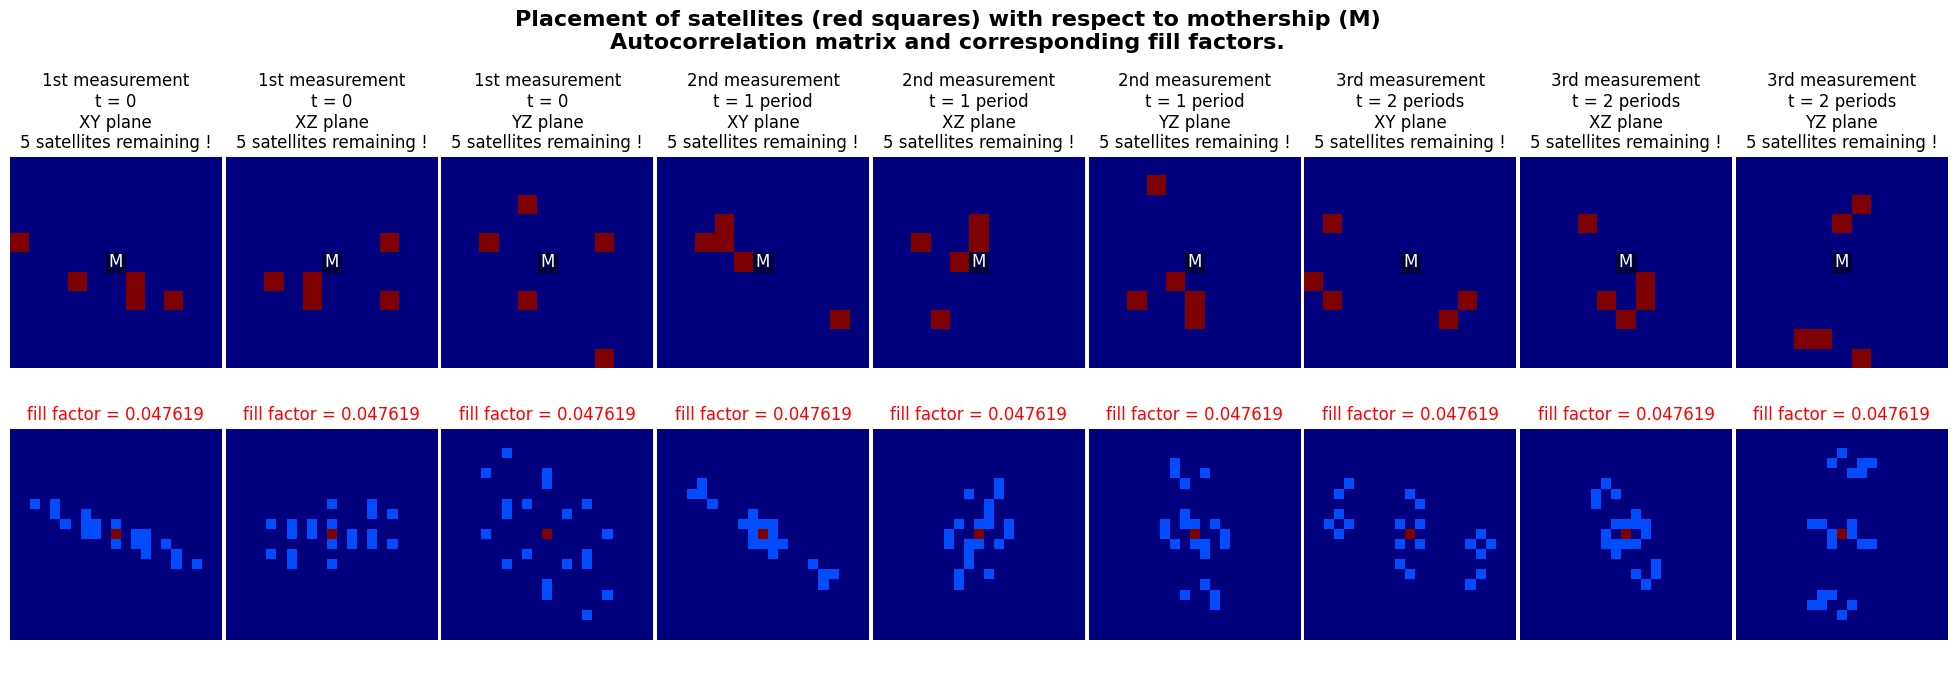

---

XY


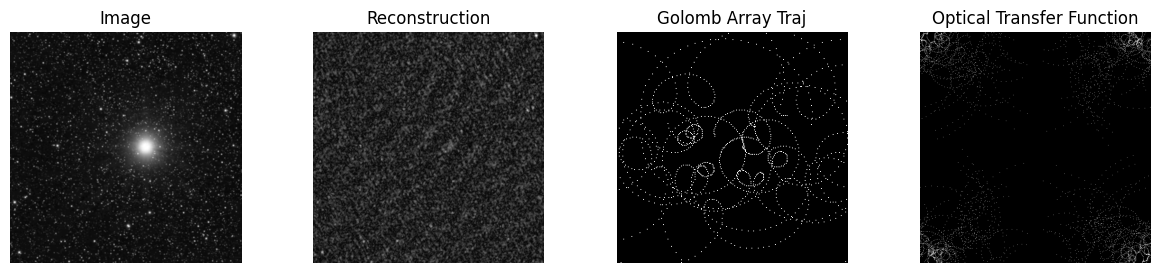

XZ


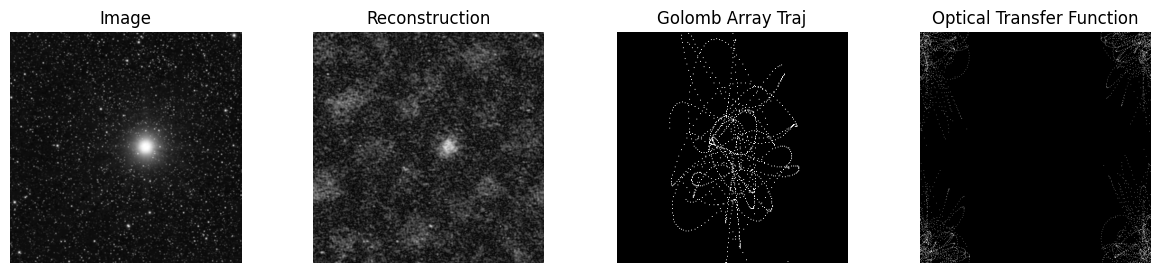

YZ


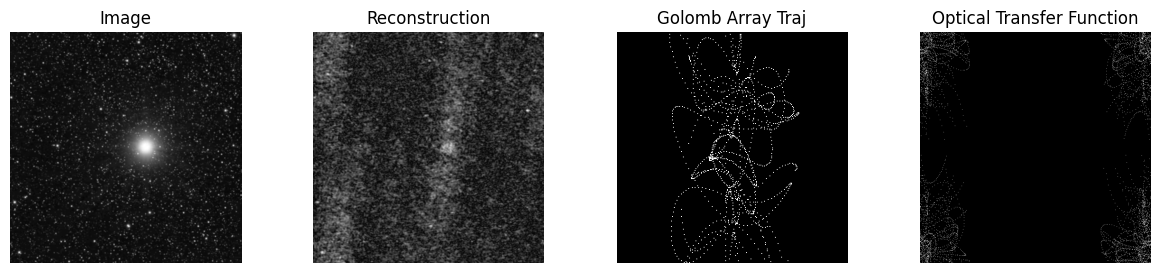

---

XY


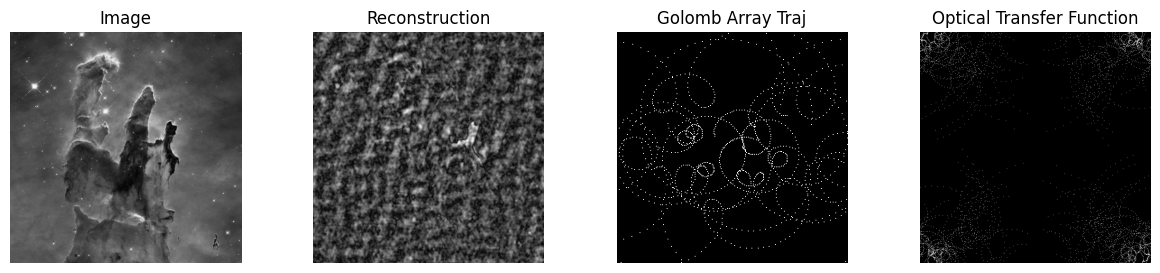

XZ


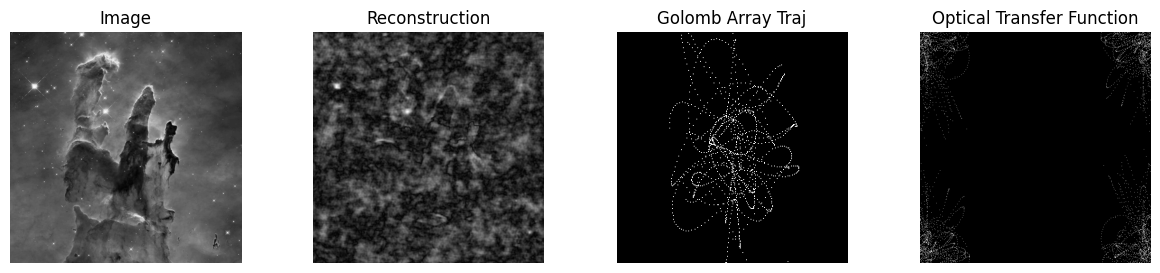

YZ


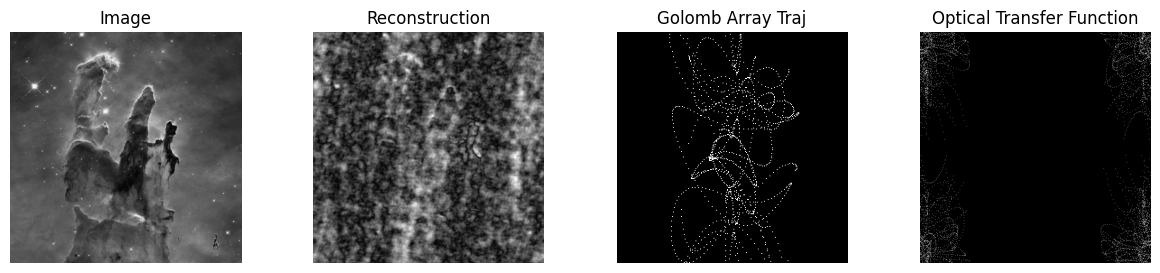

In [6]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

result = differential_evolution(
    func=lambda solution: UDP.fitness(solution)[0],
    x0=x0,
    maxiter=150,
    popsize=80,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x, show_simulated_reconstruction=True)

#### Force Golomb Optimal

Solution:  [-0.19184545 -0.27769934 -0.08488908  0.12147537  0.23147052  0.23877875
  0.6756103   0.28485601 -0.25561524 -0.16147889  0.75979034  0.01281392
 -0.16262375  0.96473488 -0.85266253 -0.01838939  0.28523959  0.85509581
  0.34676031  0.46897836 -0.43598849 -0.72364264 -0.27515494  0.36177732
  0.57604602  0.42915535 -0.30949174 -0.13380316  0.68612163 -0.7557032 ]
Fitness:  [-0.14285714285714285]


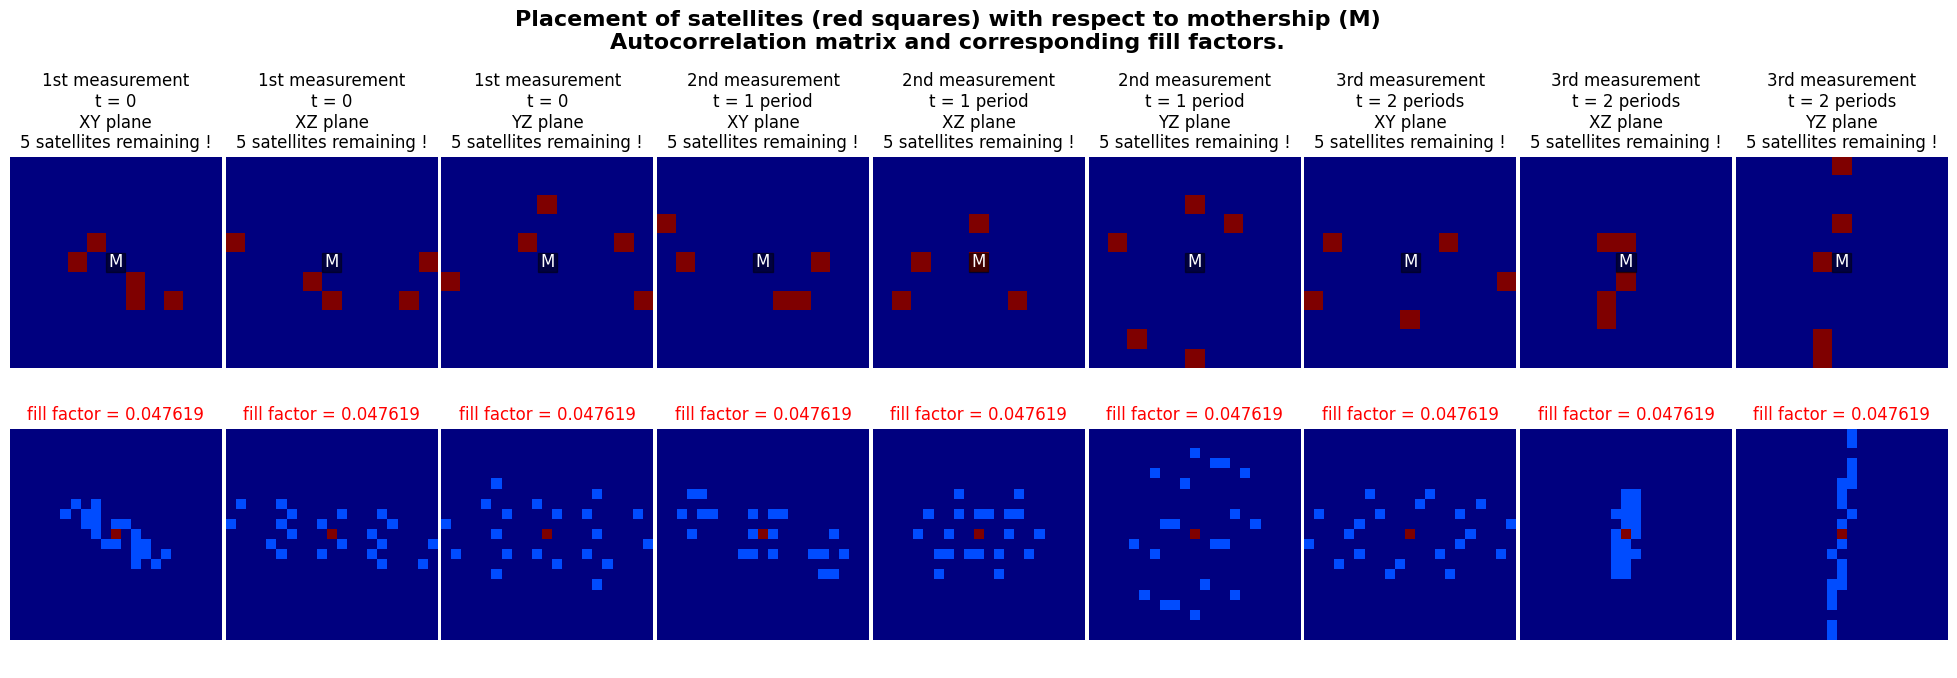

---

XY


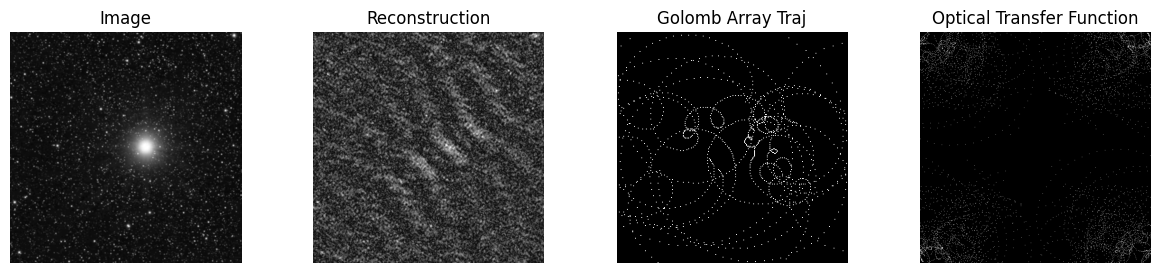

XZ


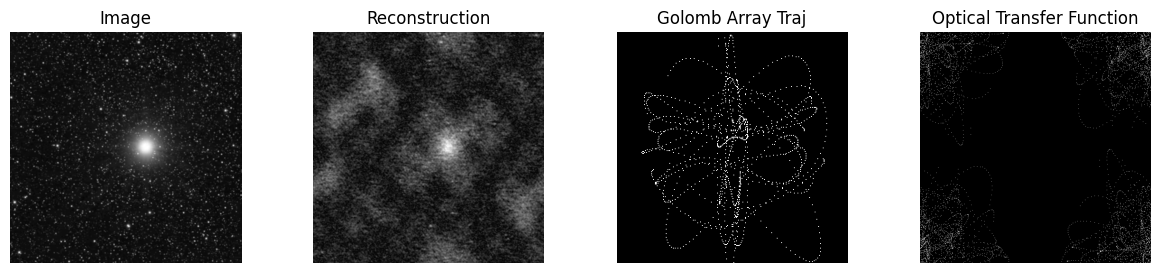

YZ


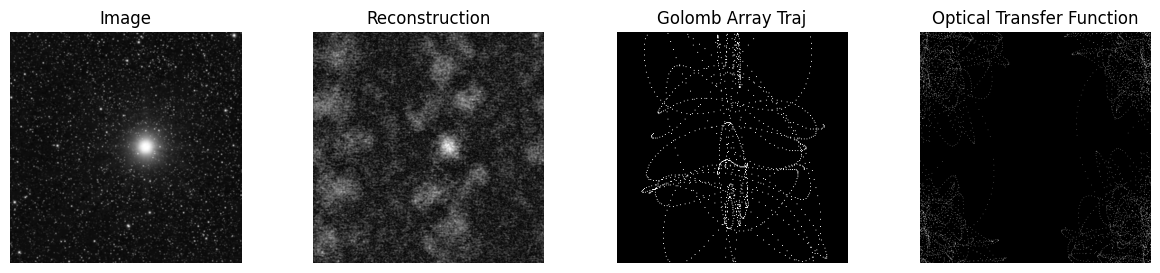

---

XY


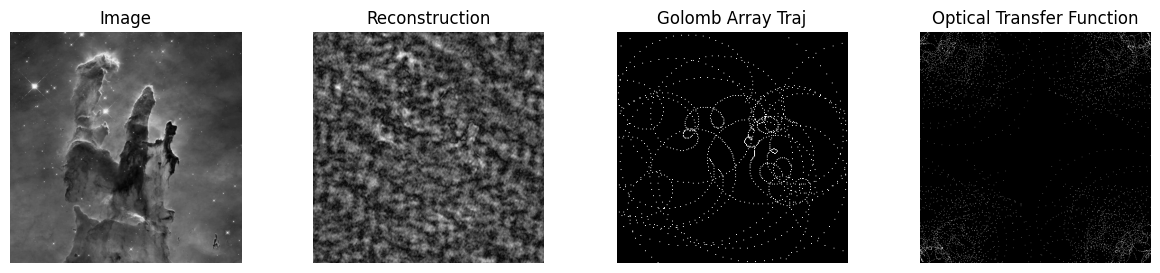

XZ


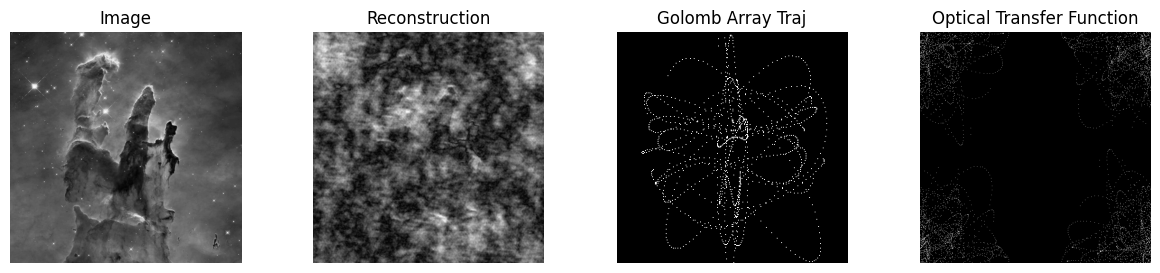

YZ


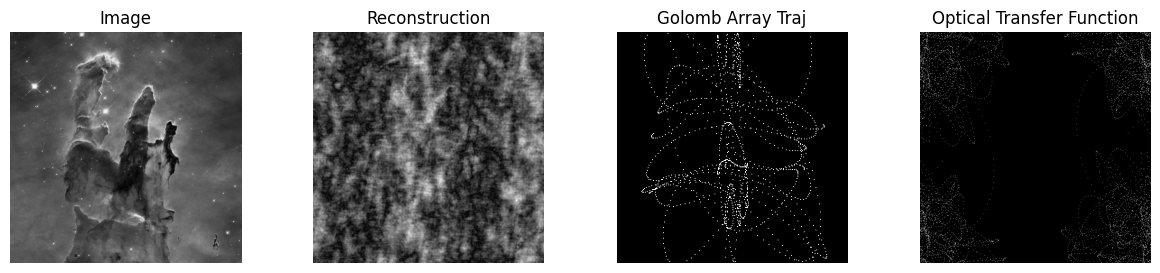

In [7]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

result = differential_evolution(
    func=lambda solution: UDP.fitness_impl(solution, reduce_fill_if_not_optimal=True)[0],
    x0=x0,
    maxiter=150,
    popsize=80,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x,show_simulated_reconstruction=True)

#### Force satellites in a smaller square

Solution:  [-0.02632104 -0.02105593 -0.08162164 -0.21987966  0.21396977 -0.25565093
  0.35376519  0.08431614  0.4476814  -0.36301557  0.03776216 -0.6207556
 -0.13114066  0.54111763  0.40284485 -0.42979782  0.25932573  0.01993839
  0.0311829  -0.09622555 -0.00825475 -0.10796268 -0.21740031 -0.62107849
  0.50606472 -0.20144129 -0.05631807  0.25171537  0.17178226  0.44874213]
Fitness:  [-0.14285714285714285]


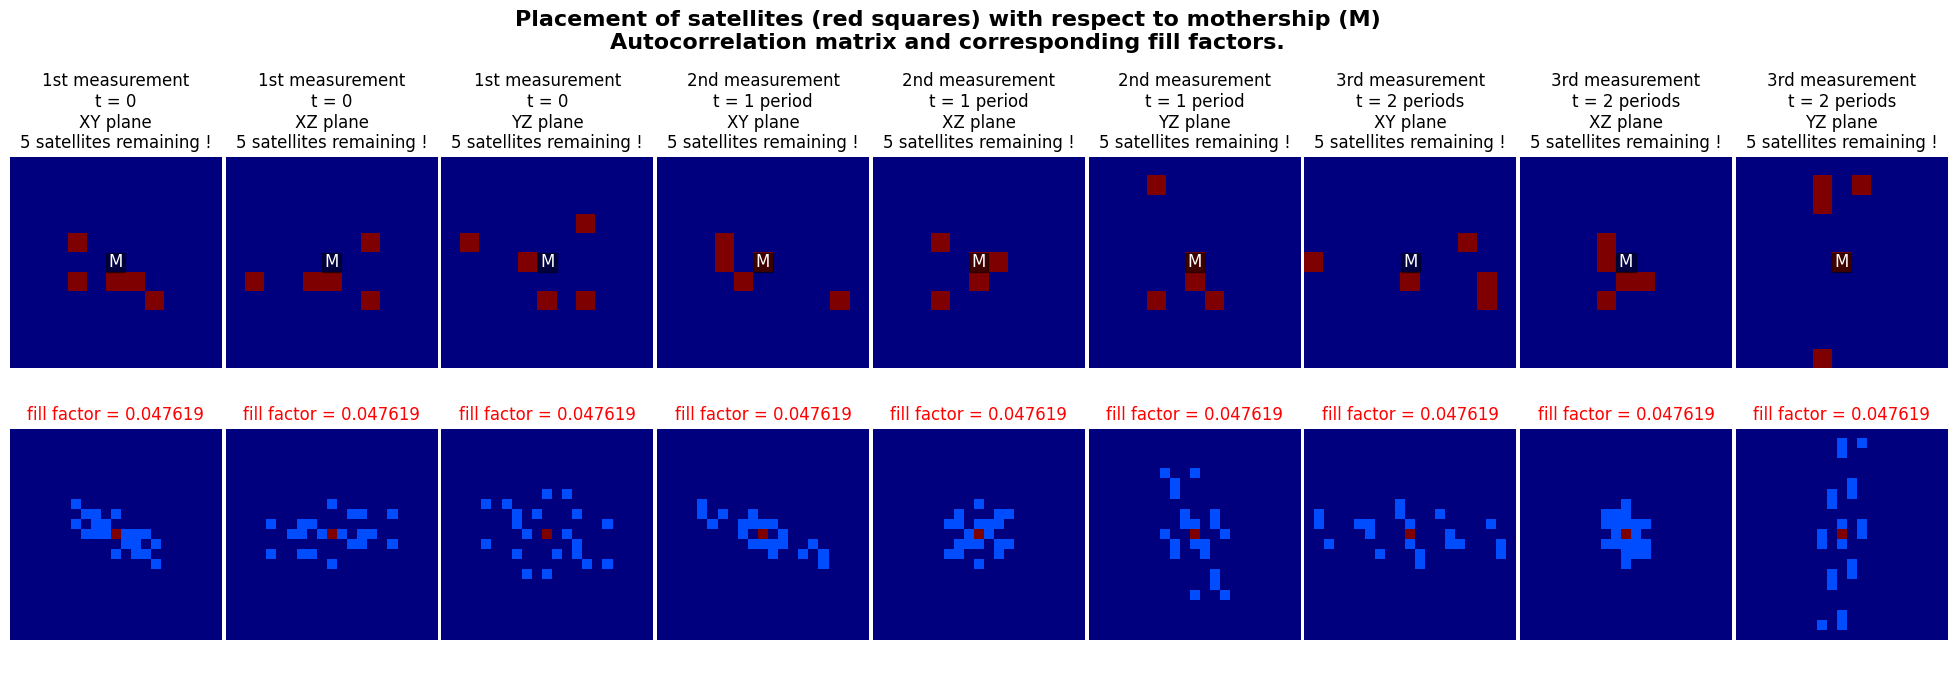

---

XY


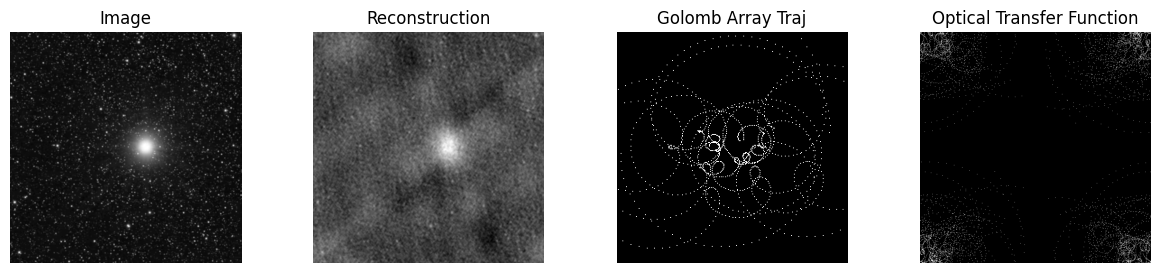

XZ


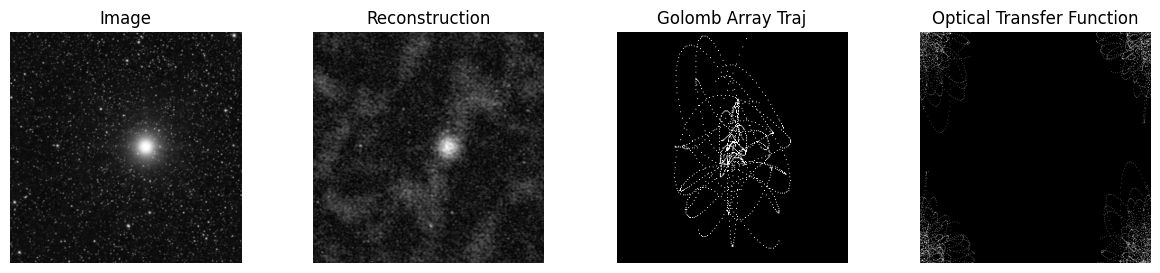

YZ


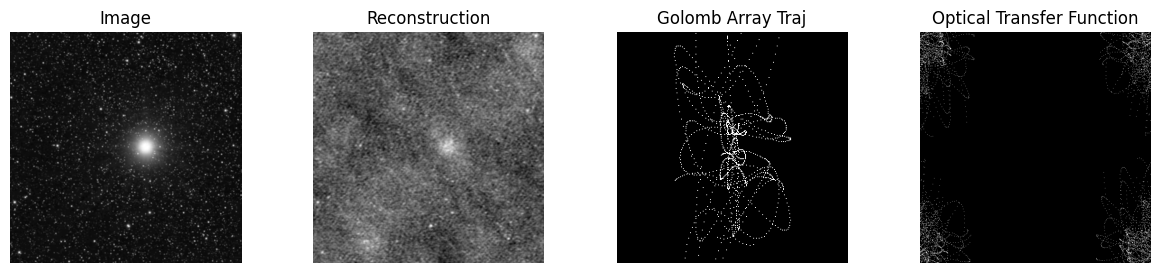

---

XY


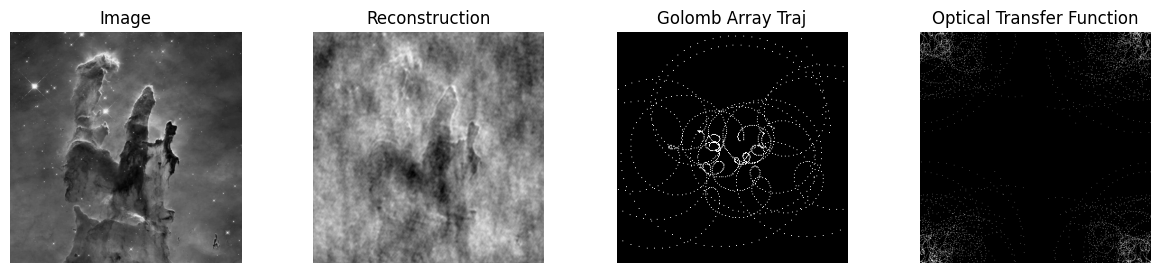

XZ


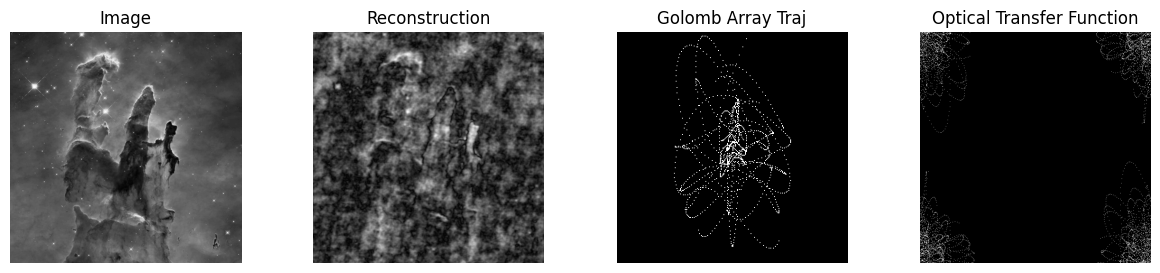

YZ


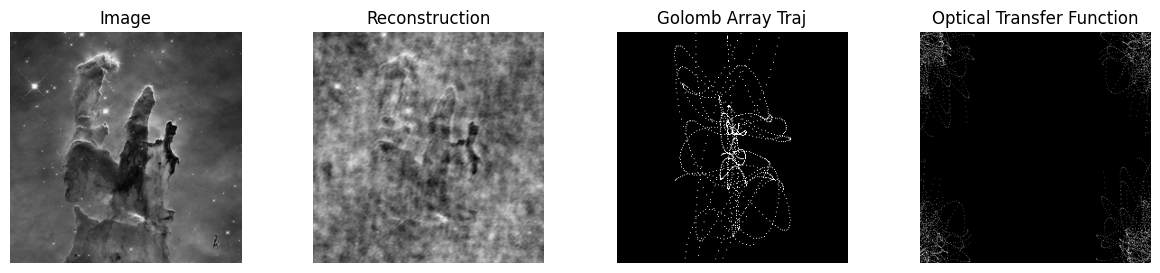

In [8]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

UDP.distance_limit_weight = 0.4
result = differential_evolution(
    func=lambda solution: UDP.fitness_impl(solution, limit_distance = 2)[0],
    x0=x0,
    maxiter=150,
    popsize=80,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x, show_simulated_reconstruction=True)

### PyGMO2

Doc: https://esa.github.io/pygmo2/overview.html

#### Self-adaptive Differential Evolution


   Gen:        Fevals:          Best:             F:            CR:            dx:            df:
      1             80    -0.00680272       0.364693       0.269534         20.775     0.00680272
      3            240    -0.00680272       0.364693       0.269534        17.1204     0.00680272
      5            400    -0.00680272       0.281899       0.269534        17.4229     0.00680272
      7            560    -0.00680272       0.281899       0.269534        18.1007     0.00680272
      9            720    -0.00680272       0.609608       0.940459        19.5131     0.00680272
     11            880     -0.0204082       0.320098       0.798163        21.1103      0.0204082
     13           1040     -0.0204082       0.389276       0.295306        16.7775      0.0204082
     15           1200     -0.0204082         0.2374       0.798163        16.5251      0.0204082
     17           1360     -0.0204082       0.951425       0.809336        13.7424      0.0204082
     19           1

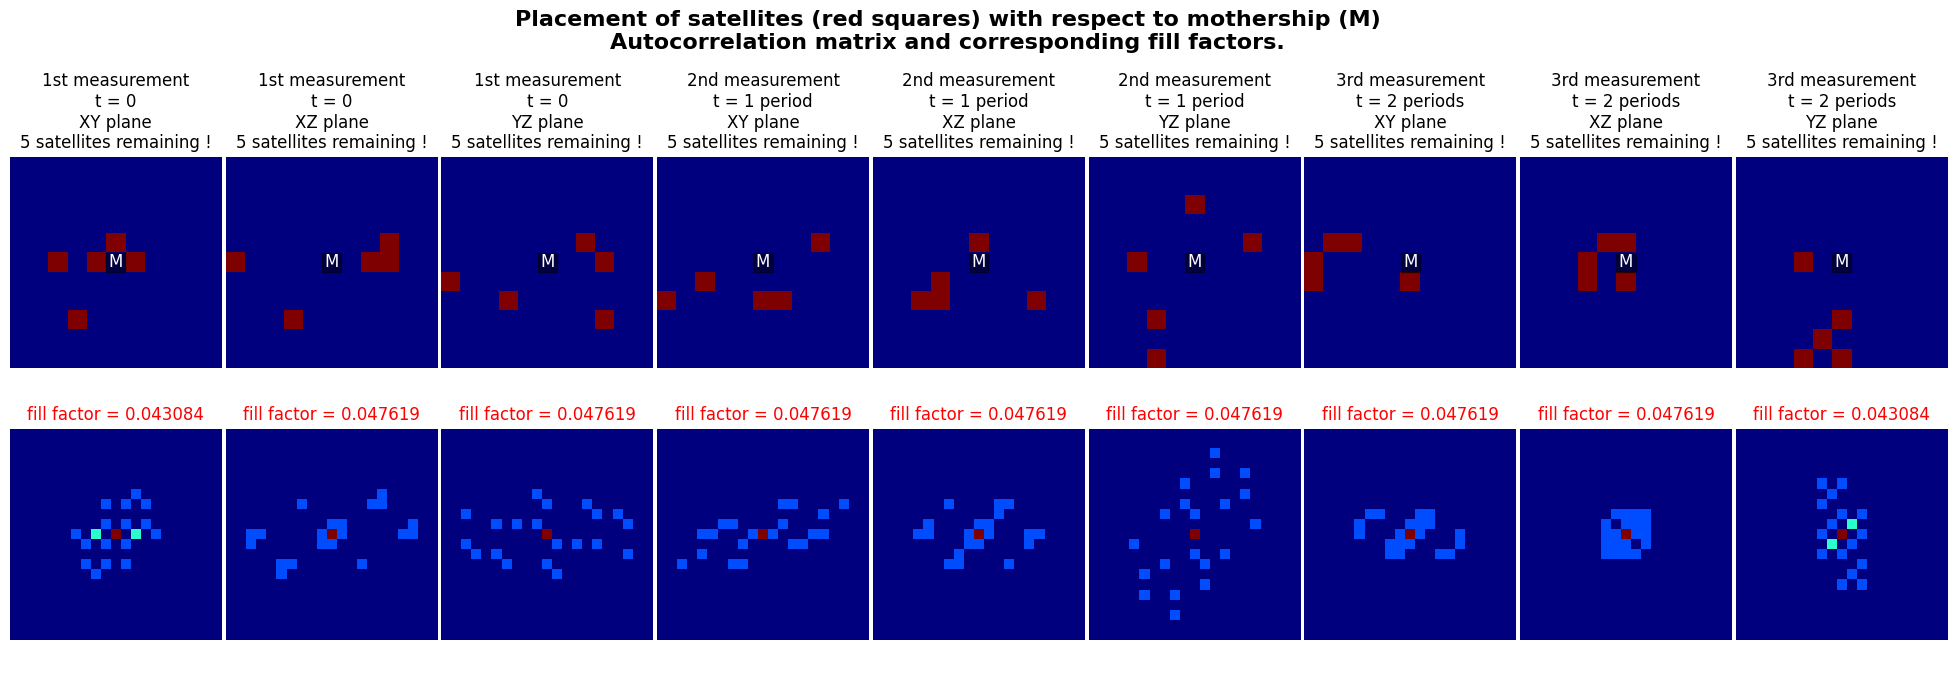

---

XY


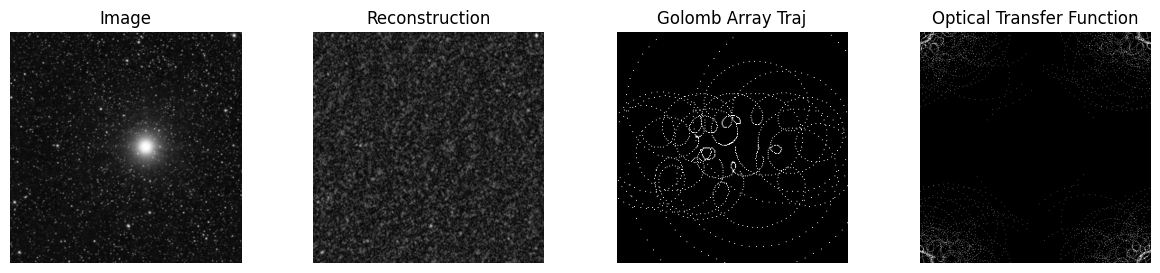

XZ


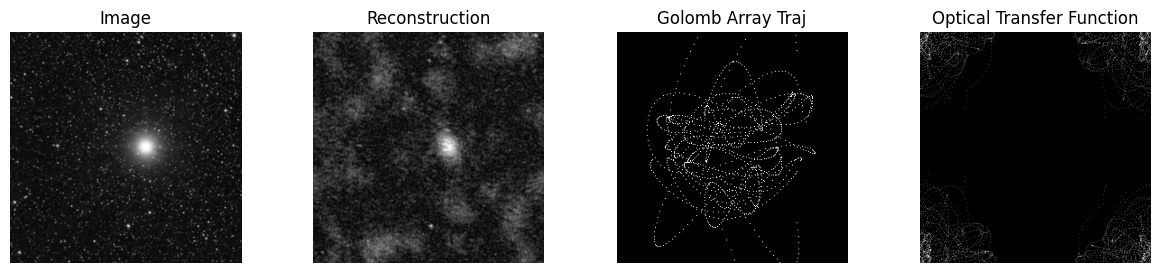

YZ


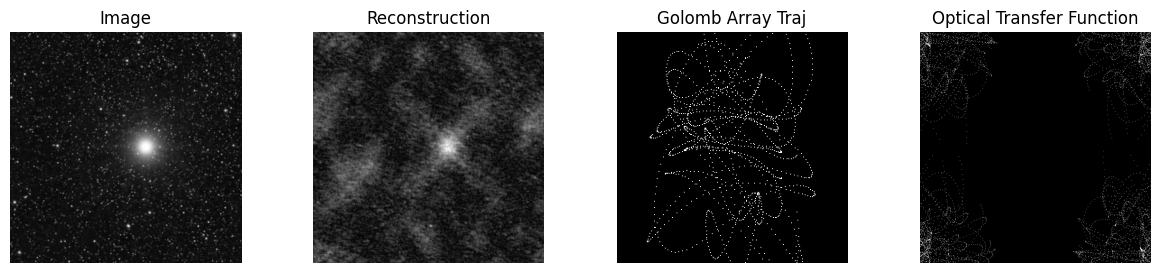

---

XY


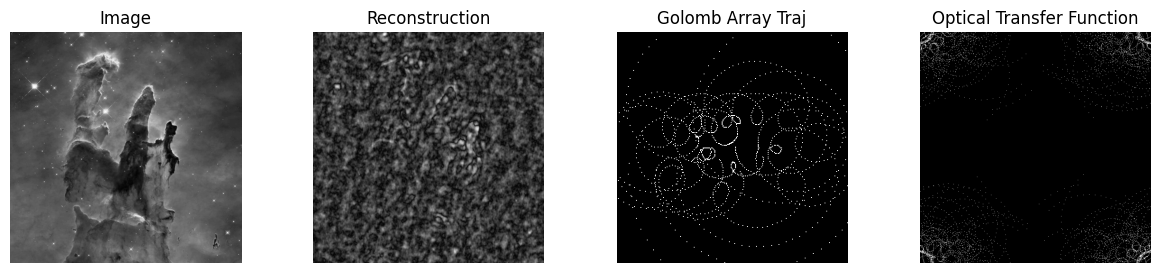

XZ


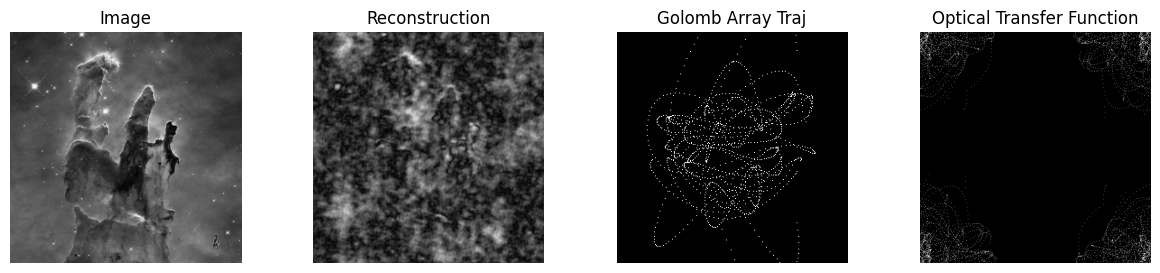

YZ


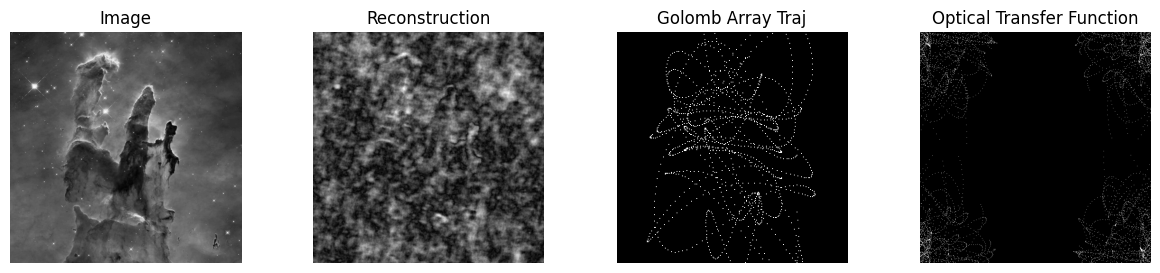

In [10]:
algo = pg.algorithm(
    pg.sade(
        gen=300, 
        variant=2, 
        variant_adptv=1, 
        ftol=0, 
        xtol=0, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(init_simple_problem())
pop = pg.population(prob,size=80)
evolve = algo.evolve(pop)

print_result(UDP,evolve.champion_x,show_simulated_reconstruction=True)
del algo, prob, pop

#### Self-adaptive Differential Evolution in pygmo flavour (pDE)

The adaptation of the mutation variant is added to `pygmo.sade`


   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1             80    -0.00680272       0.146657       0.112347             12        18.1187     0.00680272
      3            240    -0.00680272       0.889916     0.00101317              2        17.1146     0.00680272
      5            400    -0.00680272       0.146657        0.09688             12         17.143     0.00680272
      7            560      -0.015873       0.580278        0.68432              8        18.7479       0.015873
      9            720     -0.0204082       0.372719       0.132995             15        20.0996      0.0204082
     11            880     -0.0204082       0.372719       0.132995             15        16.6297      0.0204082
     13           1040     -0.0204082       0.372719       0.132995             15        13.4889      0.0204082
     15           1200     -0.0204082       0.372719       0.132995             15        15.64

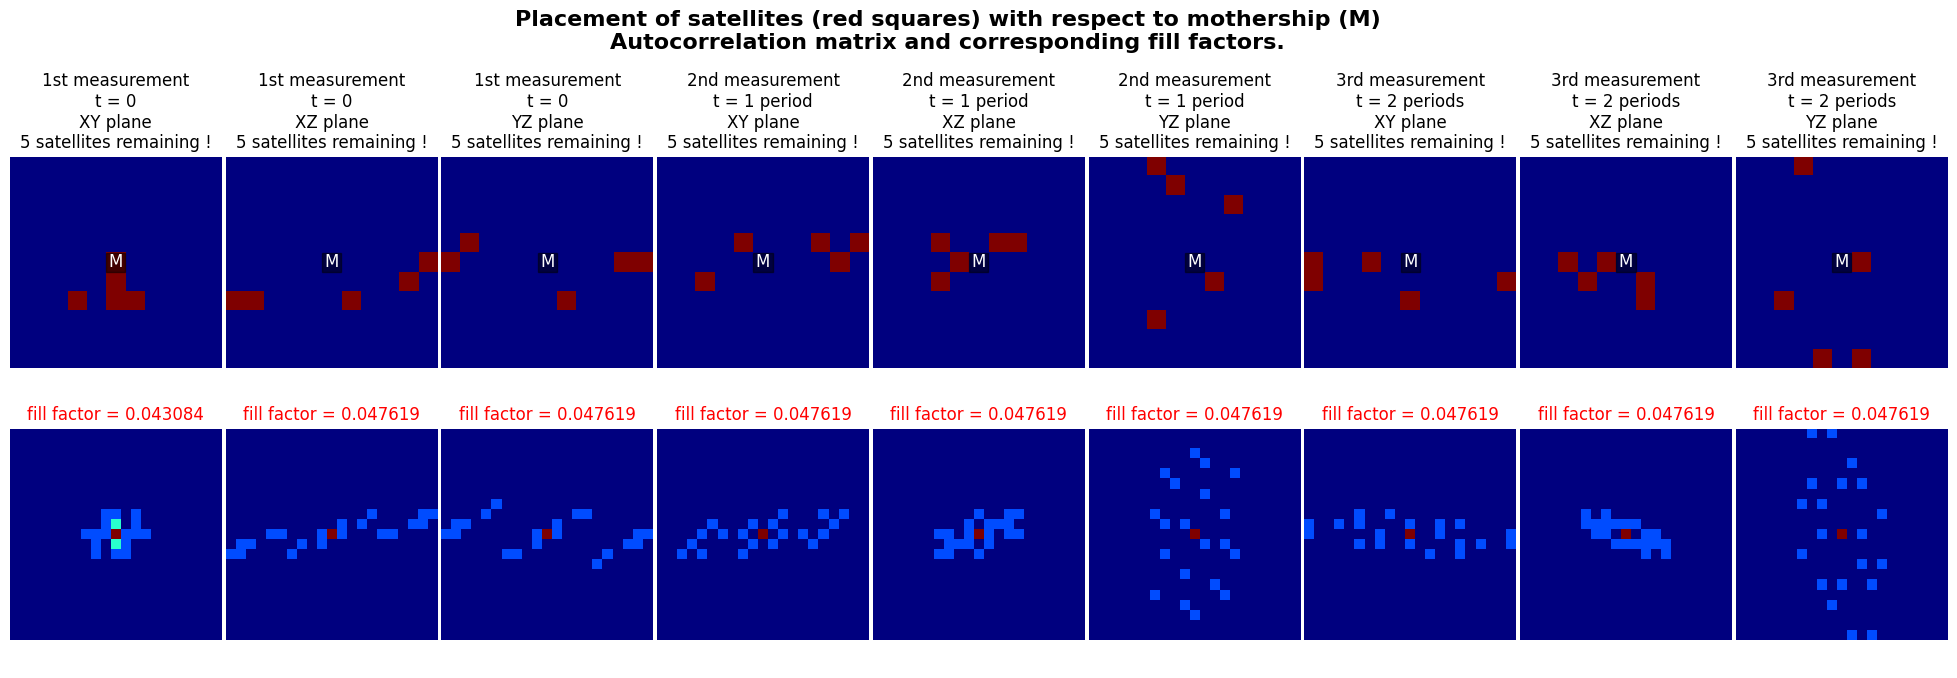

---

XY


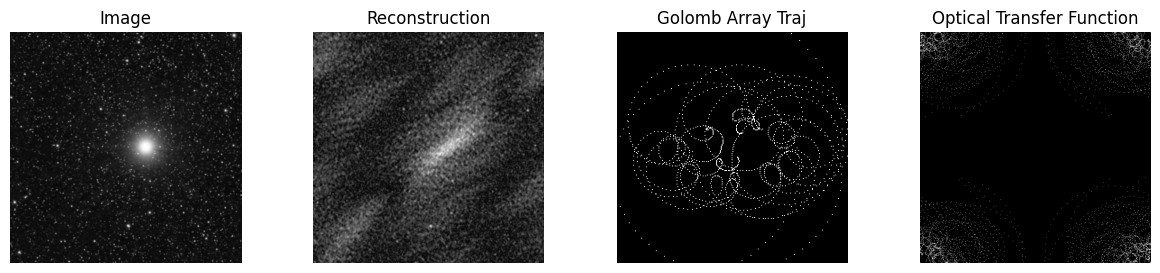

XZ


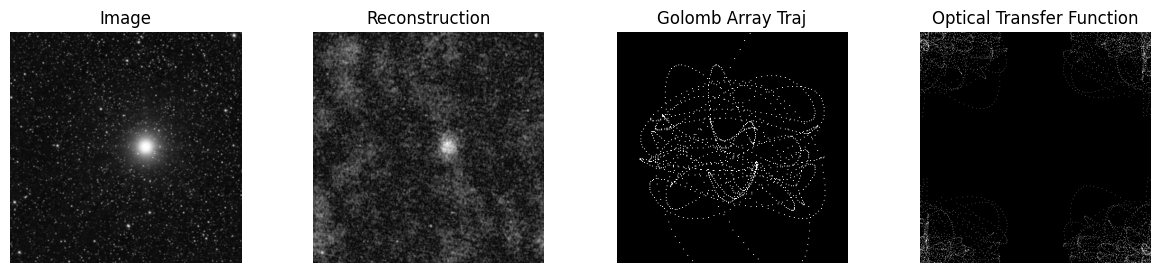

YZ


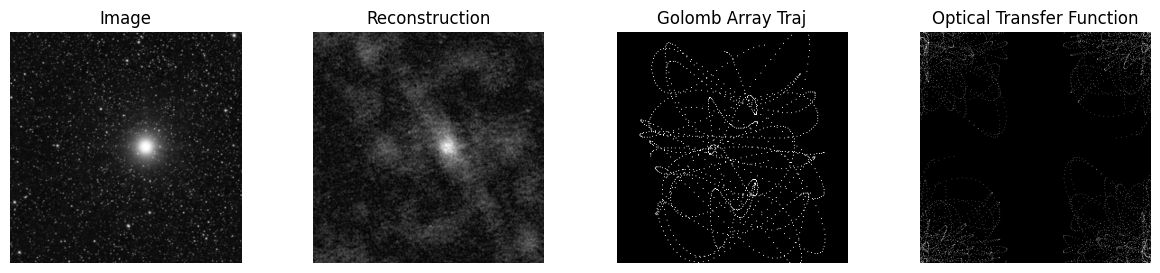

---

XY


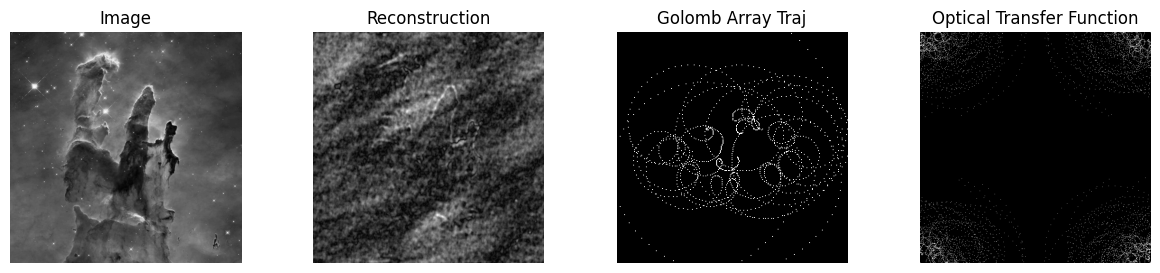

XZ


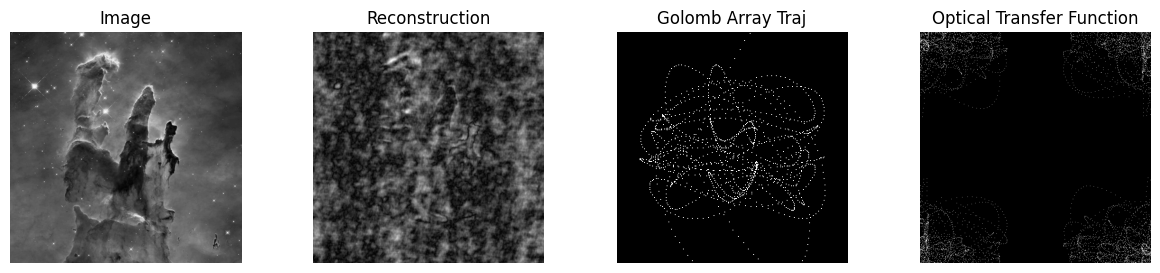

YZ


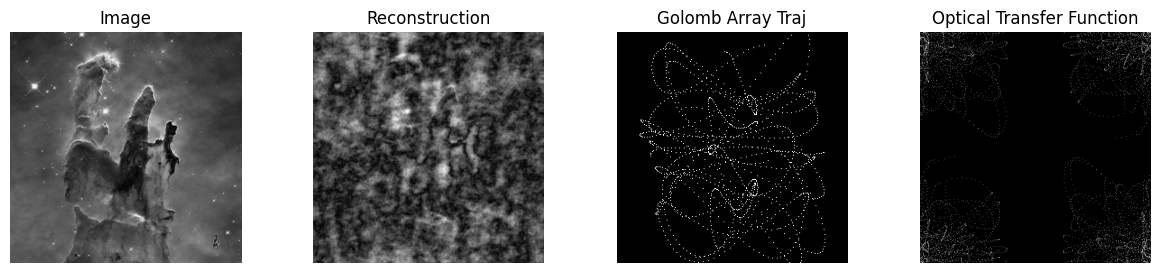

In [11]:
algo = pg.algorithm(
    pg.de1220(
        gen=300, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=0, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(init_simple_problem())
pop = pg.population(prob,size=80)
evolve = algo.evolve(pop) 
x = evolve.champion_x

print_result(UDP,x,show_simulated_reconstruction=True)
del algo, prob, pop, evolve

## Medium Problem


   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1            750     -0.0232005       0.786417       0.940888             12        161.767      0.0232005
      3           2250     -0.0327186       0.157115       0.678164              8        153.192      0.0327186
      5           3750     -0.0374777       0.941478       0.218454             12        156.469      0.0374777
      7           5250     -0.0374777       0.349094        0.35863              8        143.316      0.0374777
      9           6750     -0.0374777       0.349094        0.35863             17        145.544      0.0374777
     11           8250     -0.0374777       0.941478       0.218454              2        146.011      0.0374777
     13           9750     -0.0434265       0.378255       0.397417             18        151.887      0.0434265
     15          11250     -0.0672219       0.138873       0.739906              8        137.1

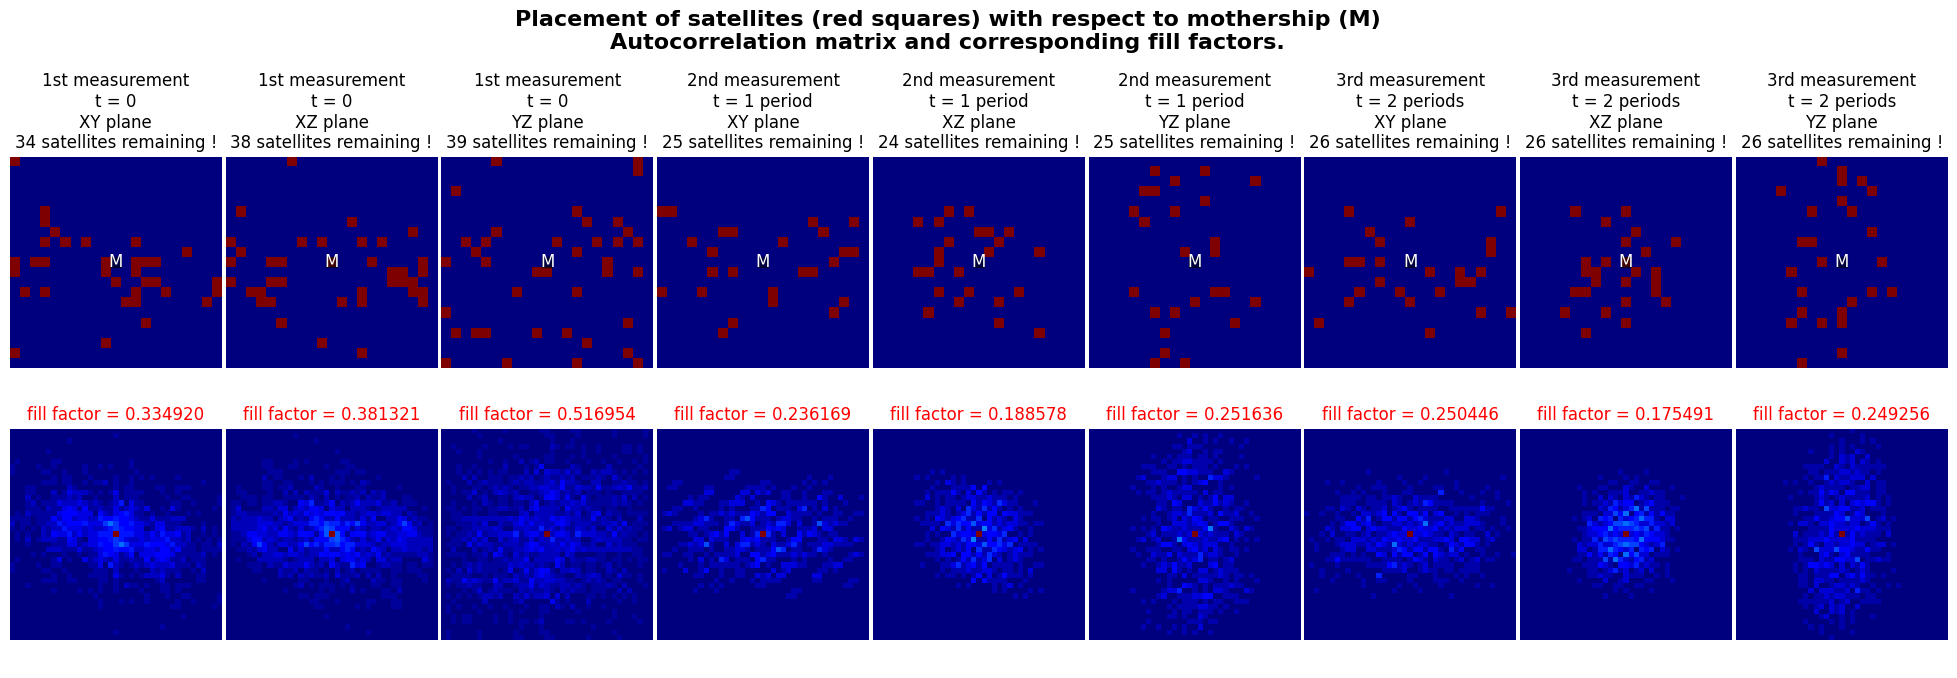

In [2]:
UDP_medium = init_medium_problem()
algo = pg.algorithm(
    pg.de1220(
        gen=2000, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=1e-3, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(UDP_medium) 
pop = pg.population(prob,size=750)
evolve = algo.evolve(pop) 

print_result(UDP_medium,evolve.champion_x)
del algo, prob, pop, UDP_medium

20 10



   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1            750     -0.0581717       0.418091        0.68401             14         80.469      0.0581717
      3           2250     -0.0581717       0.985582       0.246573              1        82.1292      0.0581717
      5           3750     -0.0914127       0.440442        0.56584             16        78.5545      0.0914127
      7           5250     -0.0914127       0.440442        0.56584             16        77.6201      0.0914127
      9           6750     -0.0914127       0.455439       0.706097              2        76.1635      0.0914127
     11           8250     -0.0914127       0.455439       0.706097              2        80.4278      0.0914127
     13           9750      -0.202216       0.303698       0.998412             18        70.5853       0.202216
     15          11250      -0.202216       0.303698       0.998412             18        61.91

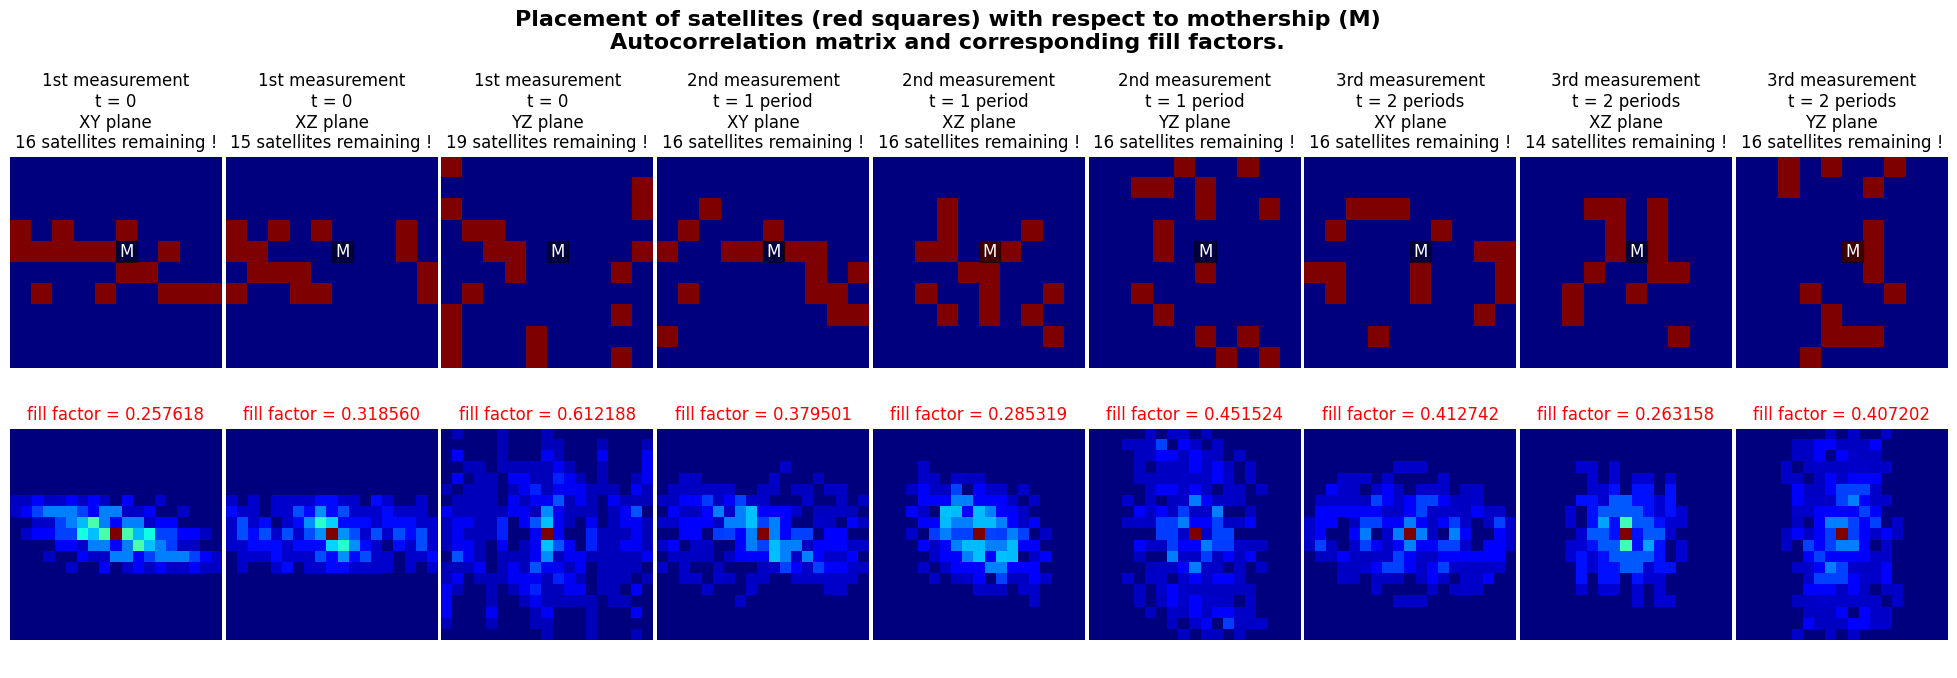

In [4]:
UDP_medium = init_medium_problem()
UDP_medium.n_sat = int(UDP_medium.n_sat/2)
UDP_medium.grid_size = int(UDP_medium.grid_size/2)
print(UDP_medium.n_sat, UDP_medium.grid_size)

algo = pg.algorithm(
    pg.de1220(
        gen=2000, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=1e-3, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(UDP_medium)
pop = pg.population(prob,size=750)
evolve = algo.evolve(pop) 

print_result(UDP_medium,evolve.champion_x)
del algo, prob, pop, UDP_medium


   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1            750     -0.0232005       0.625552       0.475834              4        165.648      0.0232005
      3           2250     -0.0374777       0.442328       0.246295             11        142.462      0.0374777
      5           3750     -0.0493754       0.927594       0.365452              6        158.067      0.0493754
      7           5250     -0.0493754       0.442328       0.246295             11        159.886      0.0493754
      9           6750     -0.0529447       0.700331       0.606515             10         134.15      0.0529447
     11           8250     -0.0541344       0.442328       0.246295             11        157.836      0.0541344
     13           9750     -0.0541344       0.442328       0.246295             11        157.948      0.0541344
     15          11250     -0.0553242       0.927594       0.630552             17         154.

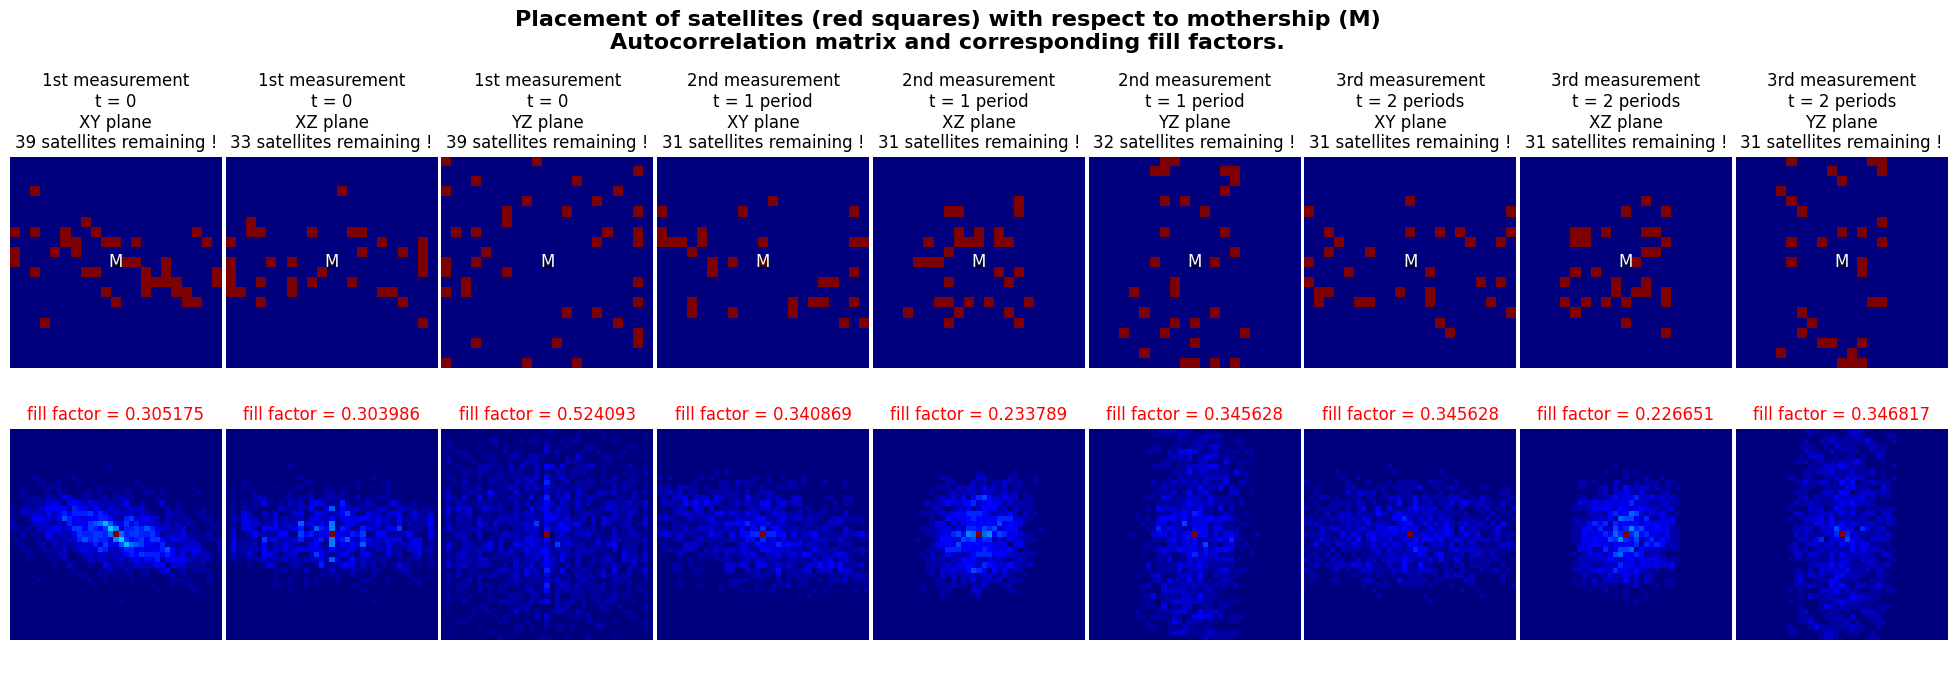

In [6]:
UDP_medium = init_medium_problem()
algo = pg.algorithm(
    pg.de1220(
        gen=5000, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=1e-3, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(UDP_medium) 
pop = pg.population(prob,size=750)
evolve = algo.evolve(pop) 

print_result(UDP_medium,  evolve.champion_x)
del algo, prob, pop, UDP_medium